In [1]:
#adapted from https://github.com/bnsreenu/python_for_microscopists/blob/master/061-Gabor_Filter_Banks.py

import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

/home/chenxiao/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/chenxiao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/home/chenxiao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modi

In [2]:
#sample image
image_path = 'data/1001-2_f542_01.jpg'
mask_path = 'data/1001-2_f542_masks_01.jpg'

In [3]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

label = cv2.imread(mask_path)
labelim = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
labelim1 = labelim.reshape(-1)
df['Labels'] = labelim1

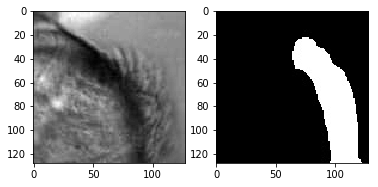

In [4]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img, cmap ='gray')
f.add_subplot(1,2, 2)
plt.imshow(labelim, cmap = 'gray')
plt.show(block=True)

In [5]:
num = 1  
kernels = []
for theta in range(1,4):   
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  
        for lamda in np.arange(np.pi / 4, np.pi, np.pi / 4):   
            for gamma in (0.05, 0.25, 0.5):   
            
                
                gabor_label = 'Gabor' + str(num)  
                
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
              
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1

Gabor1 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor2 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.25
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor5 : theta= 0.7853981633974483 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.25
Gabor6 : theta= 0.7853981633974483 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.7853981633974483 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.7853981633974483 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.25
Gabor9 : theta= 0.7853981633974483 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor10 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor11 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.25
Gabor12 : theta= 0.7853981633974483 

In [6]:
#training
Y = df["Labels"].values
X = df.drop(labels = ["Labels"], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

#predicting
prediction_test_train = model.predict(X_train)
prediction_test = model.predict(X_test)

print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

/home/chenxiao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/home/chenxiao/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/home/chenxiao/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the bu

Accuracy on training data =  0.9924467841611353
Accuracy =  0.8083613060726274


/home/chenxiao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/chenxiao/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [7]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp[:10])

Gabor7            0.061427
Gabor43           0.059848
Gabor22           0.051119
Gabor25           0.051042
Gabor23           0.048737
Gabor26           0.048324
Original Image    0.046481
Gabor44           0.046021
Gabor8            0.044769
Gabor24           0.043924
dtype: float64


/home/chenxiao/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
